In [2]:
#Importing libraries for data manipulation
import pandas as pd
import numpy as np

#Importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Importing library for train and test split
from sklearn.model_selection import train_test_split

#Importing library for classification
from sklearn.ensemble import RandomForestRegressor

#Importing library for accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Importing libraries for feature selection
from sklearn.feature_selection import f_regression

#Importing library for loading data
from sklearn.datasets import load_boston

In [3]:
#Loading data
data = load_boston()

In [5]:
#Checking data attributes
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
#Splitting data into X & y
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

#Checking the shape of the data
X.shape, y.shape

((506, 13), (506,))

In [7]:
#Splitting data into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Checking shape of the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [8]:
#Implmenting F test
sel = f_regression(X_train, y_train)

#Checking the result
sel

(array([ 67.88373341,  42.5882052 , 114.32053565,  15.16146759,
         84.01381137, 410.22923907,  52.62108097,  23.52225415,
         71.0138496 , 107.77140852, 127.84477945,  52.51669749,
        476.33924983]),
 array([2.47106569e-15, 2.03782449e-10, 1.19094157e-23, 1.15540575e-04,
        2.56313418e-18, 2.24321025e-63, 2.09805519e-12, 1.76842089e-06,
        6.38597383e-16, 1.58503068e-22, 6.31725885e-26, 2.19901681e-12,
        3.19774395e-70]))

In [11]:
#Creating dataframe for p value
p_value = pd.DataFrame()
p_value['features'] = X_train.columns
p_value['p_value'] = sel[1]
p_value.reset_index(drop=True, inplace = True)
p_value.sort_values(by='p_value', ascending = False, inplace = True)
p_value

,features,p_value
3,CHAS,1.155406e-04
7,DIS,1.768421e-06
1,ZN,2.037824e-10
11,B,2.199017e-12
6,AGE,2.098055e-12
0,CRIM,2.471066e-15
8,RAD,6.385974e-16
4,NOX,2.563134e-18
9,TAX,1.585031e-22
2,INDUS,1.190942e-23


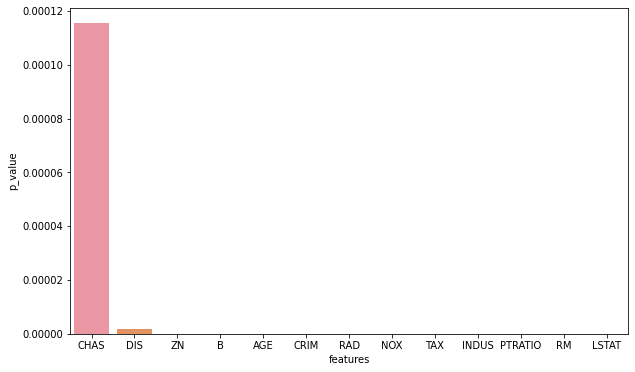

In [13]:
#Visualizsing the p values
plt.figure(figsize=(10,6))
sns.barplot(x = p_value['features'], y= p_value['p_value']);

In [26]:
#Extracting the variables greater than 0.000001
p_value[p_value['p_value']>0.000001]['features'].values

array(['CHAS', 'DIS'], dtype=object)

In [27]:
#Removing variables have p values less than 0.000001
X_train_p = X_train.drop(columns=['CHAS', 'DIS'], axis = 1)
X_test_p = X_test.drop(columns=['CHAS', 'DIS'], axis = 1)

#Checking shape of the data
X_train_p.shape, X_test_p.shape

((404, 11), (102, 11))

In [30]:
#Creating function who train the model and extract accuracy
def regressor(X_train, X_test, y_train, y_test):
  rf = RandomForestRegressor()
  rf.fit(X_train_p, y_train)
  y_pred = rf.predict(X_test_p)
  r2 = r2_score(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print('R2',r2, 'RMSE',rmse)

In [31]:
%%time
#Extract accuracy after feature selection
regressor(X_train_p, X_test_p, y_train, y_test)

R2 0.86959953423532 RMSE 3.0923711744213627
CPU times: user 312 ms, sys: 4.78 ms, total: 316 ms
Wall time: 322 ms


In [32]:
%%time
#Extract accuracy on original data
regressor(X_train, X_test, y_train, y_test)

R2 0.8700452454050691 RMSE 3.0870817601932163
CPU times: user 321 ms, sys: 0 ns, total: 321 ms
Wall time: 326 ms
